In [21]:
import os
import json
from pprint import pprint
import re
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt


def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

def length_keys(li):
    return len(li)

In [23]:
dir_name = '../json/hop_flower-4096/'
all_files = os.listdir(dir_name)
print('Found {} files in {}'.format(len(all_files), dir_name))
all_files.sort(key=natural_keys)
all_files_data_list = []

for f in all_files:
    with open(dir_name + f) as data_file:
        all_files_data_list.append(json.load(data_file))

keys_sorted = []
for d in all_files_data_list:
    sorted_keys = [x for x in d['blocks']]
    sorted_keys.sort(key=natural_keys)
    keys_sorted.append(sorted_keys)
    

Found 32 files in ../json/hop_flower-4096/


In [29]:
keys_sorted[1]

['block_0',
 'block_1',
 'block_2',
 'block_3',
 'block_4',
 'block_5',
 'block_6',
 'block_7']

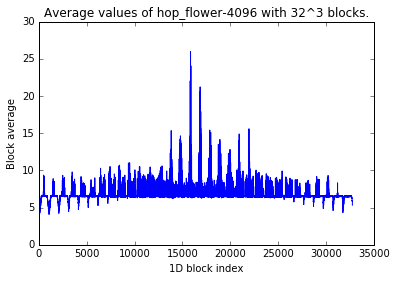

In [14]:
averages = np.array([data['blocks'][x]['avg_val'] for x in keys_sorted])
plt.plot(averages)
plt.title('Average block values of hop_flower-4096 with 32^3 blocks.')
plt.xlabel('1D block index')
plt.ylabel('Block average')
plt.show()

In [ ]:
minmin = np.min(averages)
maxmax = np.max(averages)
tmin = []
kept = []
for t in np.arange(minmin,maxmax):
    tmin.append(t)
    kept.append(len([x for x in averages if x > t]))
    
print( "Mean of avgs: {} median: {}".format(np.mean(averages), np.median(averages)))    
plt.plot(tmin, kept)
plt.title('Blocks kept vs min. avg. value threashold.')
plt.xlabel('Minimum average threashold value')
plt.ylabel('# blocks kept')
plt.show()

# Plot shows how many blocks are kept as the minimum threshold of average value increases from the min to the max.
# Kept blocks drop off sharply as tmin increases beyond 5.